In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def forward(X, W1, b1, W2, b2):
    Z = 1 / (1 + np.exp(-X.dot(W1) - b1))
    A = Z.dot(W2) + b2
    expA = np.exp(A)
    Y = expA / expA.sum(axis=1, keepdims=True)
    return Y, Z

In [4]:
def cost(T, Y):
    dot_T_Y = np.sum(T * np.log(Y), axis = 1)
    return -dot_T_Y.sum()

In [5]:
def derivative_w2(Z, T, Y):
    return -Z.T.dot(T - Y)

In [6]:
def derivative_b2(T, Y):
    return (-(T - Y)).sum(axis=0)

In [7]:
def derivative_w1_sig(X, Z, T, Y, W2):
    dZ = (T - Y).dot(W2.T) * Z * ( 1 - Z)
    ret2 = X.T.dot(dZ)
    return -ret2

In [8]:
def derivative_b1_sig(T, Y, W2, Z):
    return (-(T - Y).dot(W2.T) * Z * (1-Z)).sum(axis=0)

In [9]:
def error_rate(p, t):
    return np.mean(p != t)

In [4]:
def y2indicator(y):

    y = y.astype(np.int32)
    ind = np.zeros((len(y), 10))

    for i in range(len(y)):
        ind[i, y[i]] = 1
        
    return ind.astype(np.float32)

In [5]:
def get_normalized_data_MNIST():
    df = pd.read_csv('./train.csv')
    data = df.values.astype(np.float32)
    np.random.shuffle(data)
    X = data[:, 1:]
    Y = data[:, 0]

    Xtrain = X[:10000]
    Ytrain = Y[:10000]
    Xtest  = X[-500:]
    Ytest  = Y[-500:]
    
    mu = Xtrain.mean(axis=0)
    std = Xtrain.std(axis=0)

    np.place(std, std == 0, 1)

    Xtrain = (Xtrain - mu) / std
    Xtest = (Xtest - mu) / std
    
    Ytrain_ind = y2indicator(Ytrain)
    Ytest_ind = y2indicator(Ytest)
   
    Ytrain_ind = Ytrain_ind.astype(np.float32)
    Ytest_ind= Ytest_ind.astype(np.float32)
    

    return Xtrain, Ytrain, Xtest, Ytest, Ytrain_ind, Ytest_ind

In [6]:
Xtrain, Ytrain, Xtest, Ytest, Ytrain_ind, Ytest_ind = get_normalized_data_MNIST()

In [8]:
Xtrain[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.0100005 , -0.0100005 ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.0100005 ,
       -0.01061589, -0.01828798, -0.02325526, -0.02188312, -0.0300669 ,
       -0.03778337, -0.03402071, -0.02800787, -0.02299222, -0.02862757,
       -0.02631038, -0.01713981, -0.01815917, -0.01725408, -0.01501504,
       -0.01702438, -0.01073098,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.01413984, -0.01631324, -0.02178985, -0.02860569, -0.03724793,
       -0.0486098 , -0.06475287, -0.08391077, -0.09942488, -0.11

In [13]:
N, D = Xtrain.shape
M = 300 
K = 10

In [14]:
W1 = np.random.randn(D, M)
b1 = np.random.randn(M)
W2 = np.random.randn(M, K)
b2 = np.random.randn(K)

In [15]:
X = Xtrain
T = Ytrain_ind
Y = Ytrain

cost: 154737.038 , error_rate: 0.895
cost: 20549.334 , error_rate: 0.056
cost: 10099.825 , error_rate: 0.036
cost: 5956.124 , error_rate: 0.020
cost: 4099.672 , error_rate: 0.015
cost: 5335.041 , error_rate: 0.026
cost: 2693.961 , error_rate: 0.011
cost: 2005.748 , error_rate: 0.008
cost: 1542.976 , error_rate: 0.006
cost: 1226.011 , error_rate: 0.005


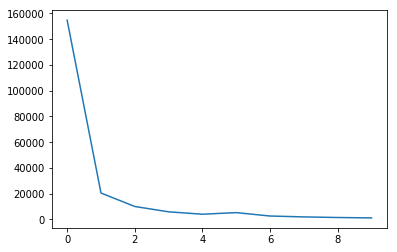

In [16]:
learning_rate = 1e-3

costs_sig = []
for epoch in range(500):
    output, hidden = forward(X, W1, b1, W2, b2)
    if epoch % 50 == 0:
        c = cost(T, output)
        P = np.argmax(output, axis=1)
        r = error_rate(Y, P)
        print("cost: %.3f , error_rate: %.3f" % (c, r))
        costs_sig.append(c)

    W2 -= learning_rate * derivative_w2(hidden, T, output)
    b2 -= learning_rate * derivative_b2(T, output)
    W1 -= learning_rate * derivative_w1_sig(X, hidden, T, output, W2)
    b1 -= learning_rate * derivative_b1_sig(T, output, W2, hidden)
    
plt.plot(costs_sig)
plt.show()

In [17]:
X = Xtest
T = Ytest_ind
Y = Ytest

output, hidden = forward(X, W1, b1, W2, b2)
c = cost(T, output)
P = np.argmax(output, axis=1)
r = error_rate(Y, P)

print(c, r)

1528.0818083777879 0.092
